In [1]:
# Simulate the Python model

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tellurium as te

In [2]:
run parsemodel.py

['A', 'B', 'M', 'E', 'R', 'W']
[50.      0.1     0.1     0.05    8.3145  0.1   ]
['kcat1', 'Ka', 'Kb', 'Km', 'dG0', 'T', 'kcat2', 'Kr', 'Kw', 'Ke', 'dG1', 'kdeg']
[10.0, 0.1, 0.1, 0.1, -1000.0, 298.0, 10.0, 0.1, 0.1, 0.1, -1000.0, 0.1]

v_J1 = kcat1*E*(A/Ka)/(1+A/Ka+B/Kb*(M/Km))*(1-exp(dG0/(R*T)+log(B*M/A)))
v_J2 = kcat2*R*(B/Kb)*(M/Km)/(1+B/Kb*(M/Km)+R/Kr*(W/Kw)*(E/Ke))*(1-exp(dG1/(R*T)+log(R*W*E/(B*M))))
v_J3 = kdeg*R
v_J4 = kdeg*E

dA/dt = -v_J1
dB/dt = v_J1 - v_J2
dM/dt = v_J1 - v_J2
dE/dt = v_J2 - v_J4
dR/dt = v_J2 - v_J3
dW/dt = v_J2 + v_J3 + v_J4



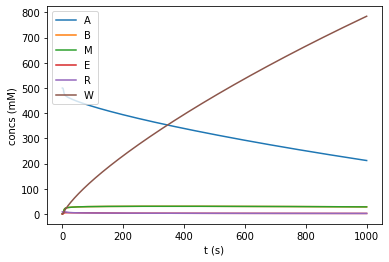

In [5]:
import model_Korman.autocatalytic as CRN

PATH_TO_OUTPUT = "./modeloutput/"
FILENAME = "autocatalytic.csv"

# Do not use dict as ordering is not guaranteed. Use list instead.
y0 = np.array([500.0, 0.1, 0.1, 0.05, 8.3145, 0.1])
params = np.array(CRN.valuesPar)
TMAX = 1000 # s
NSTEPS = 10000

time = np.linspace(0,TMAX,NSTEPS)
sol = odeint(CRN.model, y0, time, args=(params,),atol=1e-12) # Scipy solver

# Plot and save plot
for i in range(sol.shape[1]):
    plt.plot(time,sol[:,i], label=CRN.keysVar[i]);
plt.xlabel('t (s)'); plt.ylabel('concs (mM)'); plt.legend()   
#plt.savefig(PATH_TO_OUTPUT+'plot.pdf',transparent=True)
plt.show() 

# Save data
#df = pd.DataFrame(sol)
#df.to_csv(PATH_TO_OUTPUT+FILENAME, index=None)

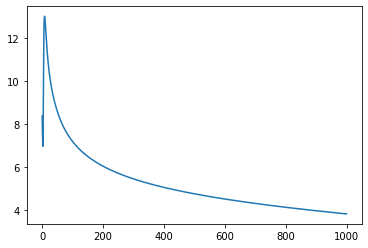

In [6]:
plt.plot(time,sol[:,3]+sol[:,4]) # biomass